In [1]:
import numpy as np


class MomentumGradientDescent:
    def __init__(
        self,
        learning_rate=0.001,
        momentum=0.9,
        max_iters=1e4,
        epsilon=1e-8,
        batch_size=32,
        record_history=False,
    ):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.batch_size = batch_size
        self.prev_delta_w = None
        if record_history:
            # to store the weight history for visualization
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        N, D = x.shape
        self.prev_delta_w = np.zeros(D)
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            for i in range(0, N, self.batch_size):
                if x.ndim == 1:
                    batch_x = x[i : i + self.batch_size]
                else:
                    batch_x = x[i : i + self.batch_size, :]

                if y.ndim == 1:
                    batch_y = y[i : i + self.batch_size]
                else:
                    batch_y = y[i : i + self.batch_size, :]

                # compute the gradient with present weight
                grad = gradient_fn(batch_x, batch_y, w)
                delta_w = self.get_delta_w(grad)

                # weight update step
                w = w - self.learning_rate * delta_w
                if self.record_history:
                    self.w_history.append(w)
            t += 1
        return w

    def get_delta_w(self, grad):
        beta = self.momentum
        delta_w = beta * self.prev_delta_w + (1 - beta) * grad
        self.prev_delta_w = delta_w

        return delta_w

In [2]:
# used to test the MomentumGradientDescent class
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):
            yh = x @ w
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

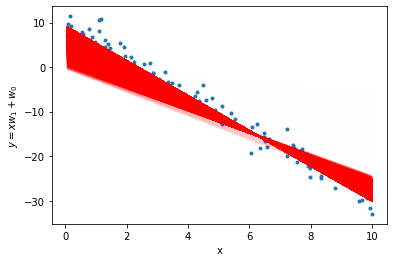

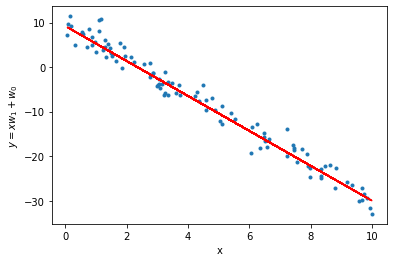

In [3]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

N = 100
x = np.random.rand(N) * 10
y = -4*x + 10 + 2*np.random.randn(N)
optimizer = MomentumGradientDescent(learning_rate=.005, max_iters=1000, record_history=True)
model = LinearRegression()
model.fit(x,y, optimizer)
plt.plot(x, y, '.')
for t,w in enumerate(optimizer.w_history):
    plt.plot(x, x*w[0]+w[1], 'r-', alpha=t/len(optimizer.w_history), label=str(t))
plt.xlabel('x')
plt.ylabel(r'$y=xw_1 + w_0$')
#plt.xlim(-20,20)
#plt.ylim(-100,100)
plt.show()

# plot the final fit
plt.plot(x, y, '.')
plt.plot(x, x*model.w[0]+model.w[1], 'r-', label=str(model.w[0]))
plt.xlabel('x')
plt.ylabel(r'$y=xw_1 + w_0$')
plt.show()